# Comparing me and my wife's Spotify playlists

In [4]:
import os
import time
import spotipy
import spotipy.util as util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_tree

### Get these from Spotify; have to create an app

In [317]:
os.environ['SPOTIPY_CLIENT_ID'] = ''
os.environ['SPOTIPY_CLIENT_SECRET'] = ''
os.environ['SPOTIPY_REDIRECT_URI'] = 'http://localhost/' #Set this up in the Spotify app
username = 'nhwuic0w21olzoed81lu7cj3k' # Get this from Spotify

In [119]:
scope = 'user-library-read'
token = util.prompt_for_user_token(username, scope) #Then copy the link from the opened window
sp = spotipy.Spotify(auth=token)

In [120]:
sp.user_playlists(user=username)

{'href': 'https://api.spotify.com/v1/users/nhwuic0w21olzoed81lu7cj3k/playlists?offset=0&limit=50',
 'items': [{'collaborative': False,
   'external_urls': {'spotify': 'https://open.spotify.com/playlist/0amYpBPhmtVJ5EI1UYAf80'},
   'href': 'https://api.spotify.com/v1/playlists/0amYpBPhmtVJ5EI1UYAf80',
   'id': '0amYpBPhmtVJ5EI1UYAf80',
   'images': [{'height': 640,
     'url': 'https://mosaic.scdn.co/640/13f894c1300cbdda027ff948ee963640c5126d294df2c4c3deb49d4c0b37434b8744087eaf7496025a1f06721e998050d8764b7dd1a2438aee52a526c664316a130cc43dd7acf1e94e560563813d4a7a',
     'width': 640},
    {'height': 300,
     'url': 'https://mosaic.scdn.co/300/13f894c1300cbdda027ff948ee963640c5126d294df2c4c3deb49d4c0b37434b8744087eaf7496025a1f06721e998050d8764b7dd1a2438aee52a526c664316a130cc43dd7acf1e94e560563813d4a7a',
     'width': 300},
    {'height': 60,
     'url': 'https://mosaic.scdn.co/60/13f894c1300cbdda027ff948ee963640c5126d294df2c4c3deb49d4c0b37434b8744087eaf7496025a1f06721e998050d8764b7dd1a24

# Get the two playlists

Hers is 'boab', mine is 'other boab'

In [17]:
other_boab = sp.user_playlist_tracks(user=username, playlist_id='0amYpBPhmtVJ5EI1UYAf80')

In [25]:
boab = sp.user_playlist_tracks(user=username, playlist_id='0XqfNJeVyxpy3eVYHdTgoe')

In [24]:
for song in other_boab['items']:
    print(song['track']['artists'][0]['name'], song['track']['name'], song['track']['popularity'], song['track']['id'])

Bowling For Soup 1985 68 5oQcOu1omDykbIPSdSQQNJ
Cage The Elephant Ain't No Rest for the Wicked 58 3kb72STxc2959ZqsTwu52i
Meghan Trainor All About That Bass 67 0ifSeVGUr7py5GggttDhXw
blink-182 All The Small Things 78 7yCPwWs66K8Ba5lFuU2bcx
Jessie J Bang Bang 77 0puf9yIluy9W0vpMEUoAnN
Jet Move On 40 2EgGQTHUvhcO04kkFaKHse
Wolfmother Joker And The Thief 63 7ISL3LO8AWP3fKIXunvqTa
Wolfmother Woman 61 3CkjLJYnnyOtGk4Jx4iYS4
Weezer King Of The World 48 5vBuxtwitUimHR2gBOnJYR
Carly Rae Jepsen Call Me Maybe 66 3TGRqZ0a2l1LRblBkJoaDx
My Chemical Romance Cemetery Drive 55 2cViIXIe8Pbd1sOJExMJlK
The Libertines Don’t Look Back Into The Sun 48 1xKrHVZW1NOH7WknHNvW8j
Dirty Pretty Things Doctors & Dealers 19 5UQLPSa84PCkQkpTFRnyhC
alt-J Left Hand Free 63 4iEOVEULZRvmzYSZY2ViKN
Joywave Destruction 59 2iLxXSM7AOzB4RCNzk4bjd
Cage The Elephant Mess Around 60 0X0Lz7LwpiIWcdGqVWaxXD
The Chainsmokers Roses 74 3vv9phIu6Y1vX3jcqaGz5Z
Glass Animals Life Itself 64 32zkKx35Et6A515oZKxDkD
Weezer Beverly Hills 66 1

In [26]:
for song in boab['items']:
    print(song['track']['artists'][0]['name'], song['track']['name'], song['track']['popularity'], song['track']['id'])

Vampire Weekend Unbelievers 62 7psPPGwhFzP3pyOcb3ivcT
Barns Courtney Glitter & Gold 65 1aJtyIMev4kW8IMUxOjn1Y
Barns Courtney Fire 65 5w6B0sAH7XauCvMOAtplQj
Barns Courtney Hellfire 59 00RI7b6oZDjx6IQC2eH6bh
Barns Courtney Sinners 52 0eUgkunDciOOiao9Sjw3PW
Barns Courtney Kicks 62 274tSPavv09i163nBnYrCU
Barns Courtney Goodbye John Smith 46 3As6sADicSuc50rlalhxQa
Mumford & Sons Babel 56 0f54nIlaoGoWTMCWMu1peO
Mumford & Sons Whispers In The Dark 47 6pLnLztz4YwPRMxMTmkNqE
Mumford & Sons I Will Wait 51 1sgzNJCMHyjhtlxxsFJNxe
Mumford & Sons Holland Road 49 4gyBgAXjXPkuhQZ98cEwGX
Mumford & Sons Ghosts That We Knew 53 2WxU94wXLXR4iTreXbx3s6
Mumford & Sons Lover Of The Light 58 7C6njUzhBb6fIpXzBYWg1n
Mumford & Sons Lovers' Eyes 48 5uECZjznd7mli6JEfTIpU5
Mumford & Sons Reminder 48 2dFjeuAs19gRJaFCDnqBiM
Mumford & Sons Hopeless Wanderer 58 7o7CXsKgDXhxbSMrqGVSd0
Mumford & Sons Broken Crown 44 7I8GqNrI3d0dNNr3imzJYz
Mumford & Sons Below My Feet 49 6IHbK391UfVVLJKAezP6fA
Mumford & Sons Not With Haste

In [89]:
bdf = pd.DataFrame({'sid': [], 'artist':[], 'track_name':[], 'popularity':[]})
obdf = pd.DataFrame({'sid': [], 'artist':[], 'track_name':[], 'popularity':[]})

In [90]:
for i, song in enumerate(boab['items']):
    bdf.loc[i] = {'sid': song['track']['id'], 'artist': song['track']['artists'][0]['name'], 'track_name': song['track']['name'], 'popularity': song['track']['popularity']}

In [91]:
bdf.head()

,sid,artist,track_name,popularity
0,7psPPGwhFzP3pyOcb3ivcT,Vampire Weekend,Unbelievers,62.0
1,1aJtyIMev4kW8IMUxOjn1Y,Barns Courtney,Glitter & Gold,65.0
2,5w6B0sAH7XauCvMOAtplQj,Barns Courtney,Fire,65.0
3,00RI7b6oZDjx6IQC2eH6bh,Barns Courtney,Hellfire,59.0
4,0eUgkunDciOOiao9Sjw3PW,Barns Courtney,Sinners,52.0


In [92]:
for i, song in enumerate(other_boab['items']):
    obdf.loc[i] = {'sid': song['track']['id'], 'artist': song['track']['artists'][0]['name'], 'track_name': song['track']['name'], 'popularity': song['track']['popularity']}

In [93]:
obdf.head()

,sid,artist,track_name,popularity
0,5oQcOu1omDykbIPSdSQQNJ,Bowling For Soup,1985,68.0
1,3kb72STxc2959ZqsTwu52i,Cage The Elephant,Ain't No Rest for the Wicked,58.0
2,0ifSeVGUr7py5GggttDhXw,Meghan Trainor,All About That Bass,67.0
3,7yCPwWs66K8Ba5lFuU2bcx,blink-182,All The Small Things,78.0
4,0puf9yIluy9W0vpMEUoAnN,Jessie J,Bang Bang,77.0


In [83]:
feat=sp.audio_features(tracks=['5oQcOu1omDykbIPSdSQQNJ'])

In [84]:
feat

[{'danceability': 0.606,
  'energy': 0.887,
  'key': 4,
  'loudness': -4.404,
  'mode': 1,
  'speechiness': 0.0598,
  'acousticness': 0.000242,
  'instrumentalness': 0,
  'liveness': 0.337,
  'valence': 0.903,
  'tempo': 119.974,
  'type': 'audio_features',
  'id': '5oQcOu1omDykbIPSdSQQNJ',
  'uri': 'spotify:track:5oQcOu1omDykbIPSdSQQNJ',
  'track_href': 'https://api.spotify.com/v1/tracks/5oQcOu1omDykbIPSdSQQNJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5oQcOu1omDykbIPSdSQQNJ',
  'duration_ms': 193000,
  'time_signature': 4}]

In [97]:
for key in feat[0].keys():
    obdf[key] = pd.Series(np.zeros(len(obdf)), index=obdf.index)
    bdf[key] = pd.Series(np.zeros(len(bdf)), index=bdf.index)

In [98]:
obdf.head()

,sid,artist,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,5oQcOu1omDykbIPSdSQQNJ,Bowling For Soup,1985,68.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3kb72STxc2959ZqsTwu52i,Cage The Elephant,Ain't No Rest for the Wicked,58.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0ifSeVGUr7py5GggttDhXw,Meghan Trainor,All About That Bass,67.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7yCPwWs66K8Ba5lFuU2bcx,blink-182,All The Small Things,78.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0puf9yIluy9W0vpMEUoAnN,Jessie J,Bang Bang,77.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
bdf.head()

,sid,artist,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,7psPPGwhFzP3pyOcb3ivcT,Vampire Weekend,Unbelievers,62.0,0.644,0.811,11.0,-7.681,1.0,0.0499,...,0.1690,0.831,154.903,0.0,0.0,0.0,0.0,0.0,202667.0,4.0
1,1aJtyIMev4kW8IMUxOjn1Y,Barns Courtney,Glitter & Gold,65.0,0.489,0.637,1.0,-5.014,1.0,0.0402,...,0.1760,0.345,170.157,0.0,0.0,0.0,0.0,0.0,176147.0,4.0
2,5w6B0sAH7XauCvMOAtplQj,Barns Courtney,Fire,65.0,0.548,0.640,10.0,-6.285,0.0,0.0306,...,0.0800,0.392,108.326,0.0,0.0,0.0,0.0,0.0,197520.0,4.0
3,00RI7b6oZDjx6IQC2eH6bh,Barns Courtney,Hellfire,59.0,0.529,0.847,4.0,-5.513,0.0,0.0482,...,0.2050,0.690,93.977,0.0,0.0,0.0,0.0,0.0,168853.0,4.0
4,0eUgkunDciOOiao9Sjw3PW,Barns Courtney,Sinners,52.0,0.500,0.854,7.0,-5.151,0.0,0.0945,...,0.0794,0.404,94.960,0.0,0.0,0.0,0.0,0.0,173773.0,4.0


# For each track get the audio features from Spotify

In [121]:
for ix, row in bdf.iterrows():
    time.sleep(0.1)
    feat=sp.audio_features(tracks=[row['sid']])
    feat = feat[0]
    bdf.at[ix, 'danceability'] = feat['danceability']
    bdf.at[ix, 'energy'] = feat['energy']
    bdf.at[ix, 'key'] = feat['key']
    bdf.at[ix, 'loudness'] = feat['loudness']
    bdf.at[ix, 'mode'] = feat['mode']
    bdf.at[ix, 'speechiness'] = feat['speechiness']
    bdf.at[ix, 'acousticness'] = feat['acousticness']
    bdf.at[ix, 'instrumentalness'] = feat['instrumentalness']
    bdf.at[ix, 'liveness'] = feat['liveness']
    bdf.at[ix, 'valence'] = feat['valence']
    bdf.at[ix, 'tempo'] = feat['tempo']
    bdf.at[ix, 'duration_ms'] = feat['duration_ms']
    bdf.at[ix, 'time_signature'] = feat['time_signature']

In [123]:
for ix, row in obdf.iterrows():
    time.sleep(0.1)
    feat=sp.audio_features(tracks=[row['sid']])
    feat = feat[0]
    obdf.at[ix, 'danceability'] = feat['danceability']
    obdf.at[ix, 'energy'] = feat['energy']
    obdf.at[ix, 'key'] = feat['key']
    obdf.at[ix, 'loudness'] = feat['loudness']
    obdf.at[ix, 'mode'] = feat['mode']
    obdf.at[ix, 'speechiness'] = feat['speechiness']
    obdf.at[ix, 'acousticness'] = feat['acousticness']
    obdf.at[ix, 'instrumentalness'] = feat['instrumentalness']
    obdf.at[ix, 'liveness'] = feat['liveness']
    obdf.at[ix, 'valence'] = feat['valence']
    obdf.at[ix, 'tempo'] = feat['tempo']
    obdf.at[ix, 'duration_ms'] = feat['duration_ms']
    obdf.at[ix, 'time_signature'] = feat['time_signature']

In [124]:
bdf.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
count,97.000000,97.000000,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0,97.0,97.0,97.0,97.0,97.000000,97.000000
mean,57.938144,0.536402,0.647351,4.85567,-6.492567,0.680412,0.057955,0.215962,0.021105,0.147911,0.429735,117.183072,0.0,0.0,0.0,0.0,0.0,227402.742268,3.958763
std,14.596528,0.132990,0.192953,3.43993,2.360837,0.468739,0.057488,0.278844,0.102975,0.108284,0.203153,29.236472,0.0,0.0,0.0,0.0,0.0,43159.970969,0.285684
min,4.000000,0.163000,0.172000,0.00000,-14.425000,0.000000,0.024800,0.000123,0.000000,0.048600,0.072300,58.748000,0.0,0.0,0.0,0.0,0.0,124520.000000,3.000000
25%,50.000000,0.445000,0.519000,2.00000,-7.591000,0.000000,0.032900,0.022400,0.000000,0.083100,0.271000,93.977000,0.0,0.0,0.0,0.0,0.0,199080.000000,4.000000
50%,59.000000,0.544000,0.659000,5.00000,-6.228000,1.000000,0.041100,0.081000,0.000113,0.106000,0.394000,115.074000,0.0,0.0,0.0,0.0,0.0,216459.000000,4.000000
75%,68.000000,0.624000,0.811000,7.00000,-5.014000,1.000000,0.059000,0.282000,0.002250,0.165000,0.571000,134.932000,0.0,0.0,0.0,0.0,0.0,249382.000000,4.000000
max,86.000000,0.801000,0.975000,11.00000,-1.656000,1.000000,0.463000,0.975000,0.732000,0.576000,0.913000,198.556000,0.0,0.0,0.0,0.0,0.0,354360.000000,5.000000


In [125]:
obdf.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000
mean,51.460000,0.519720,0.820020,4.920000,-5.483140,0.780000,0.064918,0.063343,0.042540,0.206356,0.582447,126.508450,0.0,0.0,0.0,0.0,0.0,228123.710000,3.940000
std,20.753688,0.163617,0.152814,3.218256,2.073141,0.416333,0.043688,0.130673,0.157900,0.139363,0.239151,27.217726,0.0,0.0,0.0,0.0,0.0,68873.053821,0.342893
min,0.000000,0.153000,0.108000,0.000000,-13.760000,0.000000,0.026800,0.000009,0.000000,0.052900,0.075400,68.992000,0.0,0.0,0.0,0.0,0.0,121160.000000,1.000000
25%,41.750000,0.428750,0.774500,2.000000,-6.876750,1.000000,0.037025,0.001825,0.000000,0.097800,0.447750,104.454250,0.0,0.0,0.0,0.0,0.0,188582.250000,4.000000
50%,57.500000,0.519000,0.864000,4.500000,-5.321000,1.000000,0.050250,0.014050,0.000037,0.147500,0.606000,120.739500,0.0,0.0,0.0,0.0,0.0,210780.000000,4.000000
75%,67.000000,0.634750,0.909750,7.000000,-3.905250,1.000000,0.072825,0.045800,0.001792,0.282500,0.772250,144.916000,0.0,0.0,0.0,0.0,0.0,244180.250000,4.000000
max,81.000000,0.939000,0.987000,11.000000,-0.782000,1.000000,0.291000,0.862000,0.876000,0.707000,0.969000,184.012000,0.0,0.0,0.0,0.0,0.0,602048.000000,4.000000


In [136]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (22, 9)

# My songs skew towards less popular

With a somewhat wider range

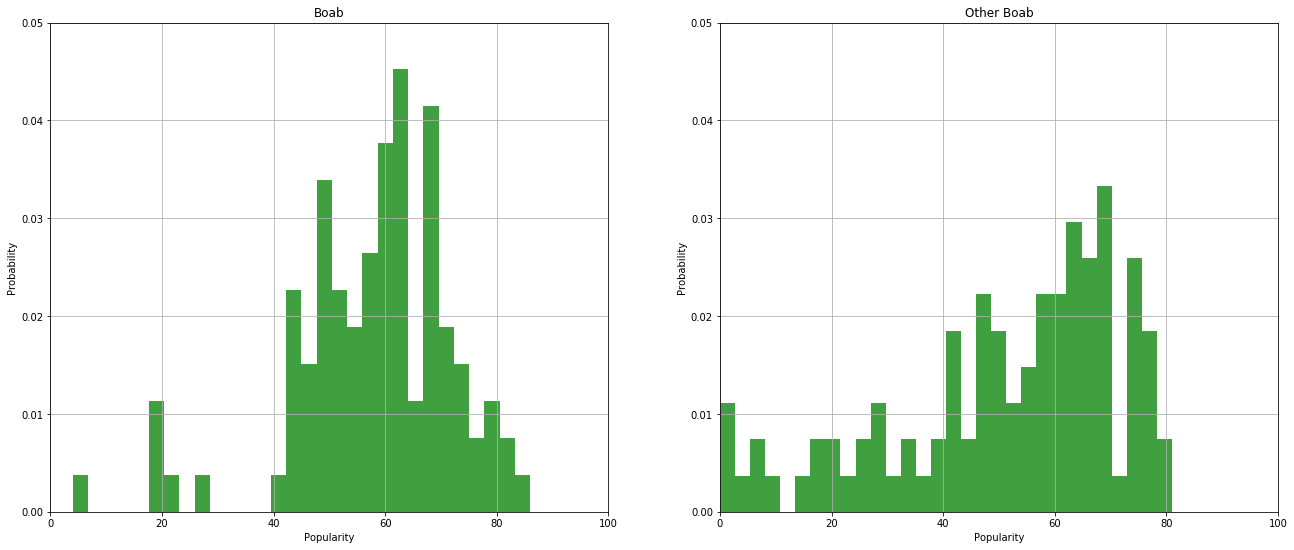

In [149]:
plt.subplot(1, 2, 1)
n, bins, patches = plt.hist(bdf['popularity'], 30, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Popularity')
plt.ylabel('Probability')
plt.axis([0, 100, 0, 0.05])
plt.title('Boab')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.xlabel('Popularity')
plt.ylabel('Probability')
plt.axis([0, 100, 0, 0.05])
plt.title('Other Boab')
plt.grid(True)
n, bins, patches = plt.hist(obdf['popularity'], 30, density=True, facecolor='g', alpha=0.75)
plt.show()

# T-test for significance

Songs in wife's playlist are significantly more popular (p=0.01); time signature differences are predictably irrelevant

In [151]:
stats.ttest_ind(bdf['popularity'], obdf['popularity'])

Ttest_indResult(statistic=2.5271151712533038, pvalue=0.012294379140983948)

In [152]:
stats.ttest_ind(bdf['time_signature'], obdf['time_signature'])

Ttest_indResult(statistic=0.4166106861868201, pvalue=0.6774214083333123)

# Find the most significant factors in my songs vs wife's songs

In [315]:
p_values = {}
for key in bdf.columns:
    if key not in ('sid', 'artist', 'track_name', 'id', 'uri', 'track_href', 'analysis_url', 'type', 'who'):
        t, p = stats.ttest_ind(bdf[key], obdf[key])
        p_values[key] = p

In [316]:
sorted(p_values.items(), key=lambda x: x[1])

[('energy', 4.66770725611036e-11),
 ('acousticness', 1.6564729409939049e-06),
 ('valence', 2.837042736490122e-06),
 ('liveness', 0.001229481945704037),
 ('loudness', 0.0016503038441510187),
 ('popularity', 0.012294379140983948),
 ('tempo', 0.021486368130268257),
 ('mode', 0.11623910160569723),
 ('instrumentalness', 0.2620002482187808),
 ('speechiness', 0.3387448730912337),
 ('danceability', 0.4340446561096597),
 ('time_signature', 0.6774214083333123),
 ('key', 0.8922868116810294),
 ('duration_ms', 0.9301804903876358)]

# Predict which playlist a song's likely to be from

In [155]:
# Tom = 1
obdf['who'] = pd.Series(np.ones(len(obdf)), index=obdf.index)
# Shamala = 0
bdf['who'] = pd.Series(np.zeros(len(bdf)), index=bdf.index)

In [156]:
both = obdf.append(bdf)

In [169]:
both = both.reset_index()

In [170]:
both.tail()

,index,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,who
192,92,86.0,0.596,0.854,7.0,-5.114,0.0,0.4630,0.0169,0.000000,0.1240,0.152,120.274,203418.0,4.0,0.0
193,93,70.0,0.579,0.904,5.0,-2.729,1.0,0.0618,0.1930,0.000000,0.0640,0.681,82.014,190947.0,4.0,0.0
194,94,71.0,0.346,0.350,2.0,-4.988,1.0,0.0328,0.8760,0.000002,0.0708,0.315,126.444,229053.0,4.0,0.0
195,95,42.0,0.276,0.176,2.0,-9.489,1.0,0.0377,0.9750,0.000067,0.0556,0.264,109.323,216459.0,5.0,0.0
196,96,26.0,0.628,0.548,0.0,-6.750,0.0,0.0248,0.2190,0.055200,0.0868,0.311,103.911,208980.0,4.0,0.0


In [161]:
both.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,who
0,68.0,0.606,0.887,4.0,-4.404,1.0,0.0598,0.000242,0.000000,0.337,0.903,119.974,193000.0,4.0,1.0
1,58.0,0.634,0.849,0.0,-7.075,1.0,0.1050,0.043800,0.000000,0.363,0.919,156.004,175493.0,4.0,1.0
2,67.0,0.811,0.879,9.0,-3.724,1.0,0.0514,0.047600,0.000002,0.109,0.962,134.064,188754.0,4.0,1.0
3,78.0,0.439,0.891,0.0,-4.764,1.0,0.0570,0.012200,0.000000,0.547,0.695,148.599,168000.0,4.0,1.0
4,77.0,0.706,0.786,0.0,-3.417,0.0,0.0909,0.260000,0.000000,0.380,0.749,150.035,199387.0,4.0,1.0


In [172]:
both = both.drop(['index'], axis=1)

In [160]:
both = both.drop(['sid', 'artist', 'track_name', 'type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1)

In [289]:
X = both.drop(['who'], axis=1)
Y = both['who']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
model = XGBClassifier(max_depth=5, n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f" % accuracy)

Accuracy: 0.75


C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [290]:
songs = obdf.append(bdf)[['artist', 'track_name']]

In [291]:
songs = songs.reset_index().drop(['index'], axis=1)

In [292]:
songs.tail()

,artist,track_name
192,5 Seconds of Summer,Youngblood
193,Panic! At The Disco,High Hopes
194,Panic! At The Disco,Dying In LA
195,Myrkur,Två Konungabarn (Single)
196,The Rural Alberta Advantage,Brother


In [293]:
X_test['who'] = y_pred

C:\Users\Tom\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [294]:
preds = X_test.join(songs)[['who', 'artist', 'track_name']]

In [295]:
preds.head()

,who,artist,track_name
127,0.0,Bishop Briggs,The Fire
52,1.0,Reel Big Fish,She Has a Girlfriend Now
193,0.0,Panic! At The Disco,High Hopes
185,1.0,fun.,Some Nights
57,1.0,The Cardigans,My Favourite Game


In [296]:
preds['who_name'] = preds['who'].replace(to_replace=1., value='Tom').replace(to_replace=0., value='Shamala')

In [297]:
preds.head(n=10)

,who,artist,track_name,who_name
127,0.0,Bishop Briggs,The Fire,Shamala
52,1.0,Reel Big Fish,She Has a Girlfriend Now,Tom
193,0.0,Panic! At The Disco,High Hopes,Shamala
185,1.0,fun.,Some Nights,Tom
57,1.0,The Cardigans,My Favourite Game,Tom
77,1.0,Taylor Swift,Shake It Off,Tom
62,1.0,Feeder,Buck Rogers,Tom
61,0.0,Tori Amos,Cornflake Girl,Shamala
189,0.0,Andrew McMahon in the Wilderness,Synesthesia,Shamala
19,1.0,The Libertines,Can't Stand Me Now,Tom


# Find the incorrect predictions

In [298]:
X = both.drop(['who'], axis=1)
y_pred = model.predict(X)

C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [299]:
X['pred_who'] = y_pred

In [300]:
X['who'] = both['who']

In [304]:
X[X.apply(lambda x: x['who'] != x['pred_who'], axis=1)].join(songs)[['who', 'pred_who', 'artist', 'track_name']] \
 .replace(to_replace=1., value='Tom').replace(to_replace=0., value='Shamala')

,who,pred_who,artist,track_name
5,Tom,Shamala,Jet,Move On
6,Tom,Shamala,Wolfmother,Joker And The Thief
61,Tom,Shamala,Tori Amos,Cornflake Girl
84,Tom,Shamala,Sir Sly,High
116,Shamala,Tom,Mumford & Sons,Broken Crown
185,Shamala,Tom,fun.,Some Nights


In [240]:
os.environ['PATH'] = 'C:\Program Files (x86)\Graphviz2.38\\bin\;' + os.environ['PATH']

# Fit a simple 1-tree model to see most important discriminators

In [281]:
X = both.drop(['who'], axis=1)
Y = both['who']
simple_model = XGBClassifier(max_depth=2, n_estimators=1)
simple_model.fit(X, Y)
y_pred = simple_model.predict(X)
accuracy = accuracy_score(Y, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.14%


C:\Users\Tom\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [282]:
plt.rcParams["figure.figsize"] = (22, 12)

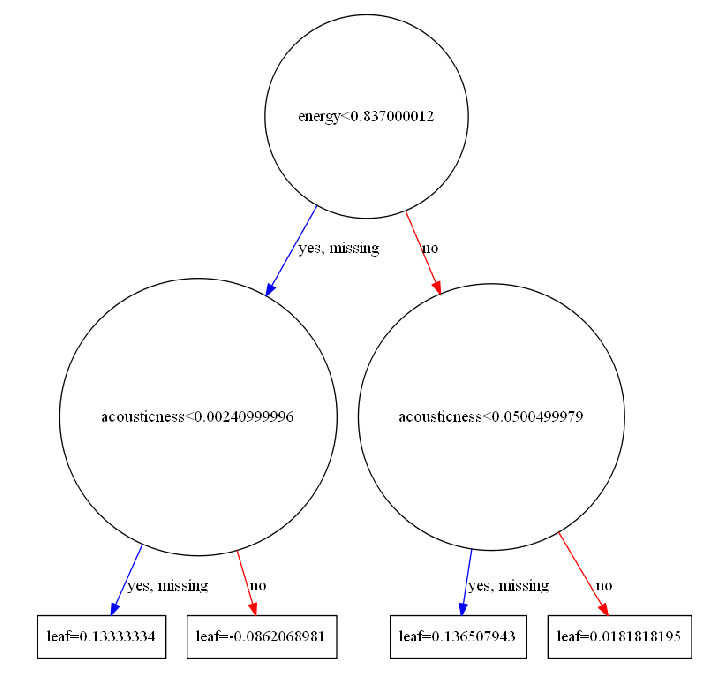

In [283]:
plot_tree(simple_model)

# As expected from the t-test scores, energy and acousticness were most significant in separating the songs